<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Machine%20Learning/Clustering/Intro_K_means%2CDBSCAN%2CMean_Shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 8 color ='blue'> Clusterização: K-means, DBSCAN e Mean Shift</font>

**Para aprender Clusterização irei utilizar as bibliotecas:**
1. Scikit-Learn
2. Plotly

# Sobre os Dados
Os dados e as informações aqui presententes foram em grande parte criadas durante o curso *Clusterização: K-means, DBSCAN e Mean Shift* da Alura cursos online.

# Sobre as informações
Neste notebook iremos tratar de Aprendizado não supervisioado. Iremos agrupar os dados baseado em Machine Leaning

# Importando Bibliotecas e Dados

In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

In [2]:
url ='/content/Wine.csv'
df = pd.read_csv(url,sep =',')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.shape

(178, 14)

In [5]:
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Po', 'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio','Total_Phenols' : 'Total_Fenois',
                          'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides','Color_Intensity':'Intensidade_de_cor'})

In [6]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


# Análise Exploratória Básica

In [7]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Os dados terão que passar por dados de adequação pois há uma discrepância entre valores estatísticos para cada variável independente. 

In [8]:
df.corr()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Fenois,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Fenois_nao_flavalonoides,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [9]:
pip install biokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.1 MB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
     |████████████████████████████████| 964 kB 57.6 MB/s 
     |████████████████████████████████| 2.3 MB 35.2 MB/s 
     |████████████████████████████████| 51 kB 593 kB/s 
     |████████████████████████████████| 47 kB 3.5 MB/s 
     |████████████████████████████████| 144 kB 58.2 MB/s 
     |████████████████████████████████| 5.8 MB 44.3 MB/s 
     |████████████████████████████████| 251 kB 62.3 MB/s 
     |████████████████████████████████| 3.2 MB 53.3 MB/s 
     |████████████████████████████████| 90 kB 8.5 MB/s 
     |████████████████████████████████| 121 kB 52.5 MB/s 
     |████████████████████████████████| 100 kB 10.1 MB/s 
     |████████████████████████████████| 84 kB 2.7 MB/s 
     |████████████████████████████████| 127 kB 66.3 MB/s 
     |████████████████████████████████| 60

In [10]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


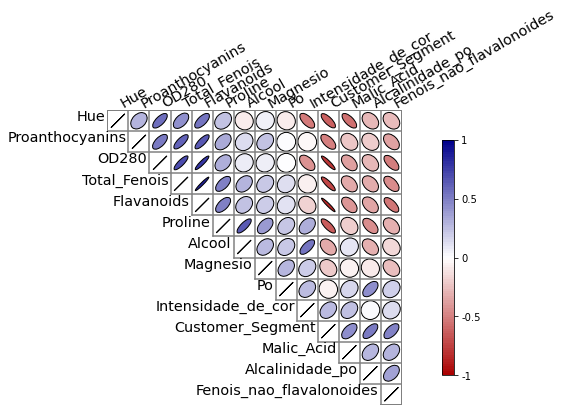

In [11]:
corr_graf = corrplot.Corrplot(df.corr())
corr_graf.plot(upper = 'ellipse', fontsize ='x-large')
fig = plt.gcf()
fig.set_size_inches(28,8)
fig.show()

# Alterando os dados

## Normalização

A técnica de normalização usada é chamada de Min-Max-Scaller. Nesta técnica cada valor da coluna passa pela seguinte conta:

$$
X_{novo} = \dfrac{X_i - X_{min}}{X_{max}-X_{min}}
$$

In [12]:
atributos = df.columns
df1 = df.copy()

In [13]:
for atributo in atributos:
  df1[atributo] = ((df1[atributo] - min(df1[atributo]))/(max(df1[atributo])-min(df1[atributo])))


In [14]:
df1.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


* Podemos utilizar também bibliotecas. Então vamos utilizar o scikit-learn.
* O interessante é que podemos realizar a desnormalização

In [15]:
from sklearn import preprocessing

In [16]:
min_max_scaller = preprocessing.MinMaxScaler()
np_df = min_max_scaller.fit_transform(df)
df =  pd.DataFrame(np_df,columns = atributos)

In [17]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [18]:
np_df = min_max_scaller.inverse_transform(df)
df = pd.DataFrame(np_df, columns = atributos)

In [19]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0


In [20]:
min_max_scaller = preprocessing.MinMaxScaler()
np_df = min_max_scaller.fit_transform(df)
df =  pd.DataFrame(np_df,columns = atributos)
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


# K-means

In [21]:
from sklearn.cluster import KMeans

n_clusters: Diz quantos grupos diferentes teremos

In [22]:
agrupador = KMeans(n_clusters = 4)

In [23]:
agrupador.fit(df)

KMeans(n_clusters=4)

In [24]:
labels = agrupador.labels_
print(labels.shape)
print(labels)

(178,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 2 2 2 1 2 1 2 2 2
 2 1 2 1 2 2 2 2 1 1 2 2 1 2 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2
 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'],
                         mode = 'markers', marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [26]:
agrupador2 = KMeans(n_clusters = 3)
agrupador2.fit(df)
labels = agrupador2.labels_
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'],
                         mode = 'markers', marker = dict(color = agrupador2.labels_.astype(np.float)),
                         text = labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'], y = df['Alcool'],z = df['Proline'],
                         mode = 'markers', marker = dict(color = agrupador2.labels_.astype(np.float)),
                         text = labels))
fig.update_layout( scene = dict(
    xaxis_title = 'Intensidade de Cor',
    yaxis_title = ' Álcool',
    zaxis_title = 'Proline'
))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [28]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.714407,0.251122,0.585879,0.331819,0.394989,0.641438,0.557463,0.301887,0.469818,0.362483,0.473198,0.691501,0.597512,-6.661338e-16
1,0.337719,0.231472,0.485740,0.472509,0.234601,0.285776,0.251934,0.643082,0.249737,0.161049,0.463957,0.379274,0.180694,5.000000e-01
2,0.323964,0.237869,0.466720,0.509213,0.283302,0.520249,0.426160,0.337615,0.453990,0.150625,0.470853,0.644845,0.167952,5.000000e-01
3,0.558882,0.512599,0.575980,0.557560,0.318614,0.240948,0.093135,0.599057,0.234556,0.521864,0.164804,0.151480,0.250996,1.000000e+00


In [29]:
fig.add_trace(go.Scatter3d(x = centros['Intensidade_de_cor'], y = centros['Alcool'],z = centros['Proline'],
                         mode = 'markers', marker = dict(color = 'red'),
                         text = [0,1,2]))
fig.show()

# DBSCAN

eps: Distância Máxima entre os pontos para não ser considerado ruído.
min_samples : É a quantidade mínima de amostra para se obter a distância
metric: é a forma de calcular distância

É importante notar que o valor -1 considera que o dado é ruído

É legal utilizar quando a distância não segue parâmetro radial. Neste caso o KMean irá falhar

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
agrupador3 = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
agrupador3.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [32]:
agrupador3.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [33]:
np.unique(agrupador.labels_)

array([0, 1, 2, 3], dtype=int32)

In [34]:
agrupador4 = DBSCAN(eps = 1.5, min_samples = 15, metric = 'manhattan')
agrupador4.fit(df)
agrupador4.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

# Mean Shift

O Mean Shift não é paramétrico, então não precisamos parametrizar os dados

In [36]:
from sklearn.cluster import MeanShift

In [39]:
np_df = min_max_scaller.inverse_transform(df)
df = pd.DataFrame(np_df, columns = atributos)

In [44]:
agrupador5 = MeanShift()
agrupador5.fit(df)
agrupador5.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [41]:
from sklearn.cluster import estimate_bandwidth

In [49]:
BW = estimate_bandwidth(df,quantile = 0.2)
print(BW)

125.64248571288931


In [50]:
agrupador6 = MeanShift(bandwidth = BW)
agrupador6.fit(df)
agrupador6.labels_

array([1, 1, 2, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 2, 2, 2, 4, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

In [52]:
agrupador6.cluster_centers_


array([[1.27005556e+01, 2.54513889e+00, 2.36347222e+00, 2.08069444e+01,
        9.50694444e+01, 1.92569444e+00, 1.42208333e+00, 4.17500000e-01,
        1.34986111e+00, 5.32361110e+00, 8.68194444e-01, 2.22986111e+00,
        5.72750000e+02, 2.47222222e+00],
       [1.33896774e+01, 2.15387097e+00, 2.37096774e+00, 1.84419355e+01,
        1.08516129e+02, 2.53387097e+00, 2.40225806e+00, 3.09354839e-01,
        1.76451613e+00, 5.12838710e+00, 9.86000000e-01, 2.98645161e+00,
        9.52032258e+02, 1.45161290e+00],
       [1.37690000e+01, 1.75650000e+00, 2.50100000e+00, 1.71150000e+01,
        1.04550000e+02, 2.84450000e+00, 3.04700000e+00, 3.02500000e-01,
        1.96050000e+00, 5.98650000e+00, 1.09850000e+00, 2.99800000e+00,
        1.23900000e+03, 1.00000000e+00],
       [1.40666667e+01, 1.88333333e+00, 2.44500000e+00, 1.63666667e+01,
        1.08833333e+02, 3.20500000e+00, 3.30333333e+00, 2.83333333e-01,
        2.18666667e+00, 6.83333333e+00, 1.09666667e+00, 3.04666667e+00,
        1.479

In [56]:
centros = pd.DataFrame(agrupador6.cluster_centers_)
centros.columns = atributos

In [57]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                         y=df['Alcool'], z=df['Proline'],
                         mode = 'markers',                      
                          marker = dict(color = agrupador6.labels_.astype(np.float)),
                        text = [0, 1, 2]))
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],
                         y=centros['Alcool'], z=centros['Proline'],
                         mode = 'markers',                  
                          marker = dict(color = 'red'),
                        text = [0, 1, 2]))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



# Coeficiente de Silhueta
É uma métrica para termos uma base no momento de avaliar o nosso modelo.
Neste coeficiente será realizado o cálculo da distância entre os pontos do mesmo grupo e dos grupos vizinhos, e assim averiguar se a distância é menor em relação ao grupo ou dos vizinhos


In [58]:
from sklearn.metrics import silhouette_score

In [59]:
faixa_n_clusters = [i for i in range(2,10)]

In [60]:
df1.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


## KMeans

In [65]:
valores_silhueta = []
for k in faixa_n_clusters:
  agrupadork = KMeans(n_clusters = k)
  labels = agrupadork.fit_predict(df1)
  media_silhueta = silhouette_score(df1,labels)
  valores_silhueta.append(media_silhueta)

In [66]:
fig =go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = "Valores de Silhueta Médios",
    xaxis_title = "Número de Clústeres",
    yaxis_title = "Valor médio de silhueta",
    )

## Mean Shift

In [67]:
faixa_quantile = np.linspace(0.02,0.5,15)

In [72]:
valores_silhueta1 = []
quantil_plot1 = []
for quantil in faixa_quantile:
  BW = estimate_bandwidth(df, quantile=quantil)
  agrupadorMS = MeanShift(bandwidth = BW)
  labels = agrupadorMS.fit_predict(df)
  if (len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1):
    media_silhueta = silhouette_score( df, labels)
    valores_silhueta1.append(media_silhueta)
    quantil_plot1.append(quantil)

In [74]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot1,
                         y = valores_silhueta1))
fig.update_layout(dict(xaxis_title = 'Quantil',
                       yaxis_title='Média Silhueta'))
fig.show()

# Comparando os modelos

In [81]:
agrupador_kmeans = KMeans(n_clusters = 3)
agrupador_dbscan = DBSCAN(eps = 2.1, min_samples = 56, metric = 'manhattan')

BW = estimate_bandwidth(df, quantile = 0.35)
agrupador_meanshift = MeanShift(bandwidth = BW)

labels_kmeans = agrupador_kmeans.fit_predict(df1)
labels_dbscan = agrupador_dbscan.fit_predict(df1)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print("Labels K-means: ", labels_kmeans)
print("Labels DBSCAN: ", labels_dbscan)
print("Labels MeanShift: ", labels_meanshift)

Labels K-means:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels DBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1  0
  0 -1  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels MeanShift:  [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 

In [83]:
print("O coeficiente de silhueta do K-means é:", silhouette_score(df1, labels_kmeans))
print("O coeficiente de silhueta do DBSCAN é: ", silhouette_score(df1,labels_dbscan))
print("O coeficiente de silhueta do MeanShift é: ", silhouette_score(df,labels_meanshift))

O coeficiente de silhueta do K-means é: 0.36950618492736303
O coeficiente de silhueta do DBSCAN é:  0.3016232115094375
O coeficiente de silhueta do MeanShift é:  0.6493586170880333
